# Reports

# Rossmann Drugstore's
###### Forecast weekly store sales
# Capa
## Business Problem and Business Questions
A Rossmann opera mais de 3.000 drogarias em 7 países europeus. Atualmente, os gerentes de loja da Rossmann têm a tarefa de prever suas vendas diárias com até seis semanas de antecedência. As vendas da loja são influenciadas por muitos fatores, incluindo promoções, competição, feriados escolares e estaduais, sazonalidade e localidade.

Você foi contratado para responder às perguntas do time de negócios da empresa, gerar insights e criar um modelo de predições acessível e de fácil utilização, para que os gerentes possam fazer as suas consultas. A aplicação deverá estar disponível em cloud e a consulta será feita através de uma planilha do tipo Google Sheets.
1. Qual será o faturamento semanal de cada loja para as próximas **15** semanas?
2. Melhores insights sobre o impacto das features no faturamento das lojas.
3. Quais são as condições ideais que os diretores deverão ter como base quando forem abrir a próxima loja Rossmann?

### Tools, Requirements and Restrictions
1. Linguagem: Python
2. Desenvolvimento e entrega do projeto: Jupyter Notebook
3. Cloud: Heroku
4. Plataforma de request: Google Sheets

## Business Assumptions
1. ...

## Solution Strategy

### Outputs
1. Através do Jupyter Notebook. Uma tabela contendo: [ período | loja | previsão de faturamento ]
2. Através do Jupyter Notebook. Gráficos e informações sobre os melhores insights.
3. Melhores parâmetros para otimização do faturamento.

### Solution Planning
1. Trabalhar os dados, treinar o modelo e gerar a tabela com os predicts.
2. Fazer uma análise exploratória de dados.
3. Utilizar a análise exploratória de dados para identificar os melhores valores para cada feature.

### Steps
1. Data Cescription - uma descrição estatística dos dados para entender os shapes das distribuições, quantidades de categorias, tamanho do dataset, dados faltantes e discrepancias.
2. Feature Engineering - criação de variáveis que ajudem a modelar o fenômeno, e auxilie na geração de insights e entendimento de negocio.
3. Data Filtering - filtragem de variáveis e amostras que não farão parte dos demais passos do desenvolvimento do projeto.
4. Exploratory Data Analysis - ampliar o entendimento de negócio, criar e testar hipóteses e ganho de entendimento do impacto das features e suas importâncias para a modelagem do fenômeno.
5. Data Prepataion - preparar os dados para o aprendizado dos modelos, de acordo com as particularidades de cada algorítmo.
6. Feature Selecion - selecionar as features que devem ou não seguir para a modelagem, tendo em vista o conceito de evitar complexidades desnecessárias.
7. Machine Learning Modeling - treinamento dos modelos e escolha do melhor modelo.
8. Hiperparameter Fining Tunning - ajuste dos parâmetros de aprendizagem.
9. Convert Model Performance to Business Values - conversão das métricas de erro em retornos financeiros.
10. Deploy Model to Predictions - disponibilizar a aplicação para consultas.

## Top 3 Data Insights
1. ... texto e gráfico
2. ... texto e gráfico
3. ... texto e gráfico

## Machine Learning Model Applied
## Machine Learning Performance
1. A métrica de erro utilizada será o ERRO QUADRADO PERCENTUAL MÉDIO

## Business Results
## Conclusions
## Leassons Learned
## Next Steps

# 0.0 Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Image
import datetime

import inflection

## 0.1 Helper Functions

In [2]:
def search_outliers(df, series):
    first_quantile = np.quantile(df[series], 0.25)
    third_quantile = np.quantile(df[series], 0.75)
    distance = (third_quantile - first_quantile) * 1.5
    inf_limit = first_quantile - distance
    sup_limit = third_quantile + distance
    index_outliers = df.loc[(df[series]<inf_limit)|(df[series]>sup_limit)].index
    return index_outliers, inf_limit, sup_limit

## 0.2 Loading Data

In [3]:
store = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\rossmann_sales_predict\\store.csv', low_memory=False)
train = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\rossmann_sales_predict\\train.csv', low_memory=False)
test = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\rossmann_sales_predict\\test.csv', low_memory=False)

df = pd.merge(train, store, how='left', on='Store')
df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
796939,500,3,2013-07-17,4537,344,1,1,0,0,d,c,10690.0,9.0,2007.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
247012,414,6,2014-12-20,10633,755,1,0,0,0,d,c,6210.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
164454,550,5,2015-03-06,7130,571,1,1,0,0,d,c,50.0,6.0,2015.0,0,NaN,NaN,NaN
236874,590,3,2014-12-31,3019,259,1,0,0,1,d,c,4520.0,9.0,2010.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
602718,289,2,2014-01-07,7204,595,1,1,0,1,d,a,6540.0,12.0,2007.0,0,NaN,NaN,NaN


# 1.0 Data Description

## 1.1 Rename Columns

In [4]:
# backup df
df1 = df.copy()

snake_case = lambda x: inflection.underscore(x)

cols_old = df1.columns.to_list()
cols_new = list(map(snake_case, cols_old))

# rename
df1.columns = cols_new

## 1.2 Data Dimension

In [5]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 1017209
Number of columns: 18


## 1.3 Data Types

In [6]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [7]:
# changing date datatype
df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [9]:
# competition_distance
df1.loc[df1['competition_distance'].isna(), 'competition_distance'] = 200000

# competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if np.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1) 

# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if np.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval
df1['promo_interval'].fillna(0, inplace=True)
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
df1.drop(['promo_interval', 'month_map'], axis=1, inplace=True)

## 1.6 Change Types

In [10]:
backup = df1.copy()

In [11]:
df1 = backup.copy()
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int')

df1['promo2_since_week'] = df1['promo2_since_week'].astype('int')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int')

## 1.7 Descriptive Statistical

### 1.7.1 Classifying Attributes

In [12]:
num_attributes = ['sales', 'customers', 'competition_distance']
cat_attributes = ['open', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'day_of_week', 'promo', 'promo2', 'is_promo']

### 1.7.2 Numerical Attributes

In [13]:
# Central Tendendy - mean, median
ct1 = pd.DataFrame(df1[num_attributes].apply(np.mean)).T
ct2 = pd.DataFrame(df1[num_attributes].apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1[num_attributes].apply(np.std)).T
d2 = pd.DataFrame(df1[num_attributes].apply(min)).T
d3 = pd.DataFrame(df1[num_attributes].apply(max)).T
d4 = pd.DataFrame(df1[num_attributes].apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df1[num_attributes].apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1[num_attributes].apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T
m.columns = 'min max range mean median std skew kurtosis'.split()
m

,min,max,range,mean,median,std,skew,kurtosis
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712


1. sales: a média e a mediana estão próximas, isso indica uma distribuição centralizada na média, a skew é baixa, o que reforça uma distribuição centralizada na média, indicando uma distribuição próxima a uma normal, a skew é positiva, então tem uma cauda direita um pouco mais pesada, kurtosis próxima de 1, inidica um pico não muito alto. A distribuição deve ser parecida com uma NORMAL.
2. customers: a média e a mediana estão prõximas mas com uma diferença de uns 5 porcento, a skew próxima a 1.5 indica um deslocamento da centralização relativamente pequeno, a skew é positiva, então tem uma cauda direita mais pesada, a kurtosis é média, sugerindo um pico relativamente alto. A distribuição pode ser parecida com uma NORMAL.
3. competition_distance: a média e a mediana estão bastante distantes, a skew é altíssima, o que sugerem que a média e a mediana estão bastante deslocadas, é a skew é positiva, portanto uma cauda direita bem mais pesada, a kurtosis é altíssima, o que aponta um pico bastante alto, com uma alta concentração, não centralizada na média, distribuição parece uma POISSON.

### 1.7.3 Categorical Attributes

In [14]:
df1[cat_attributes].apply(lambda x: x.nunique())

open              2
state_holiday     4
school_holiday    2
store_type        4
assortment        3
day_of_week       7
promo             2
promo2            2
is_promo          2
dtype: int64

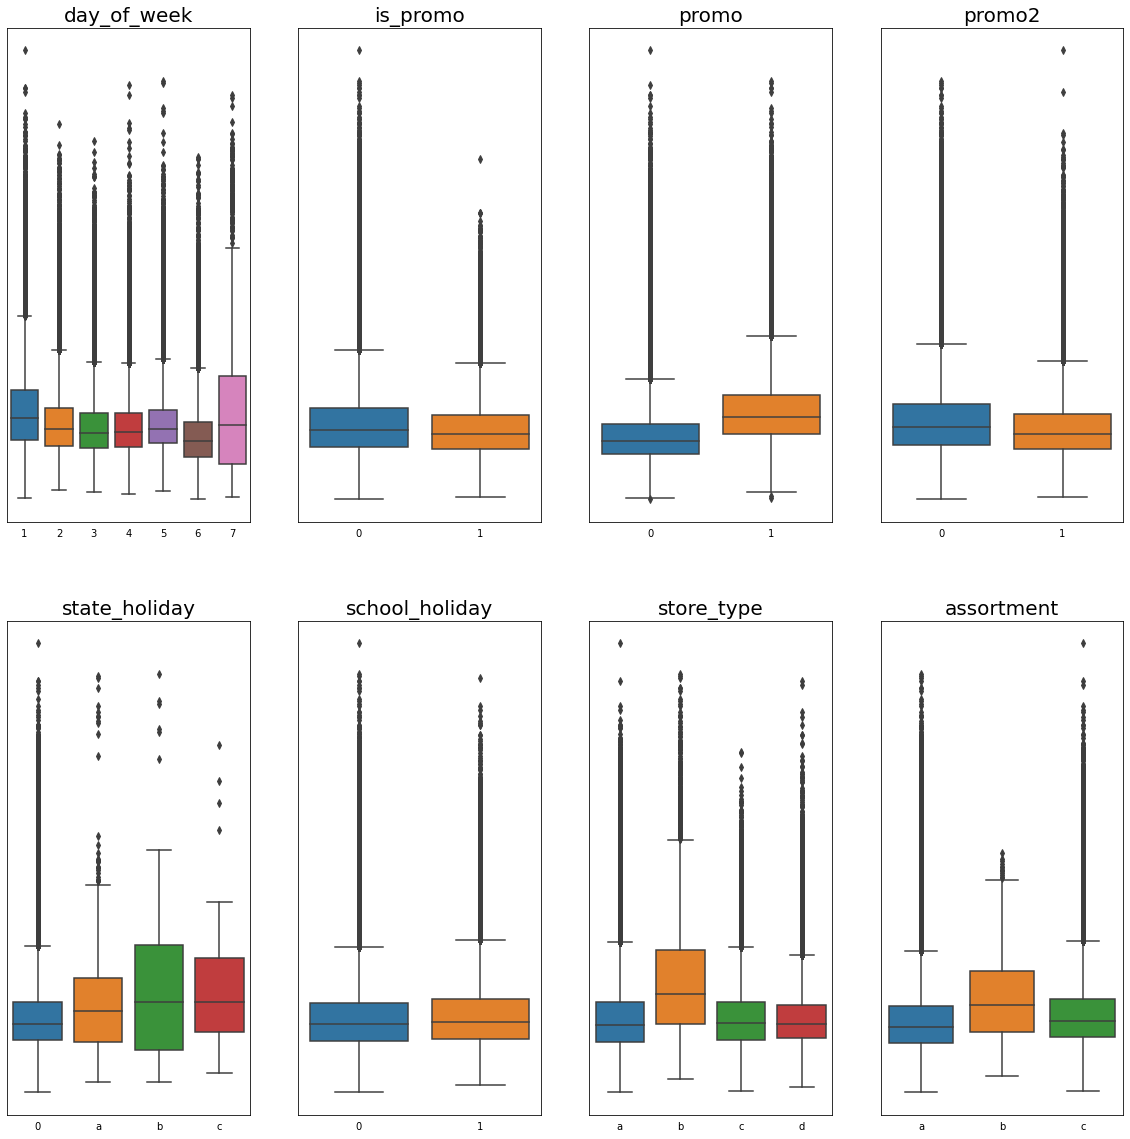

In [15]:
temp = df1[cat_attributes].astype('category')
temp['sales'] = df1['sales']
temp = temp.loc[temp['sales']>0]

plt.figure(figsize=(20, 20))

plt.subplot(2, 4, 1)
ax = sns.boxplot(x='day_of_week', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('day_of_week', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 2)
ax = sns.boxplot(x='is_promo', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('is_promo', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 3)
ax = sns.boxplot(x='promo', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('promo', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 4)
ax = sns.boxplot(x='promo2', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('promo2', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 5)
ax = sns.boxplot(x='state_holiday', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('state_holiday', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 6)
ax = sns.boxplot(x='school_holiday', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('school_holiday', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 7)
ax = sns.boxplot(x='store_type', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('store_type', fontsize=20)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 4, 8)
ax = sns.boxplot(x='assortment', y='sales', data=temp)
ax.tick_params(bottom=False, labelleft=False, left=False)
# ax = sns.despine(left=True)
plt.title('assortment', fontsize=20)
plt.xlabel('')
plt.ylabel('');

1. domingos têm uma distribuição mais espalhada, com maior variância
2. promoções do tipo promo aumentam as vendas
4. feriados geram vendas relativamente maiores e com maior variância
6. store_type do tipo b claramente têm maiores vendas

# 2.0 Feature Engineering

## 2.1 Hypothesis Mindmap

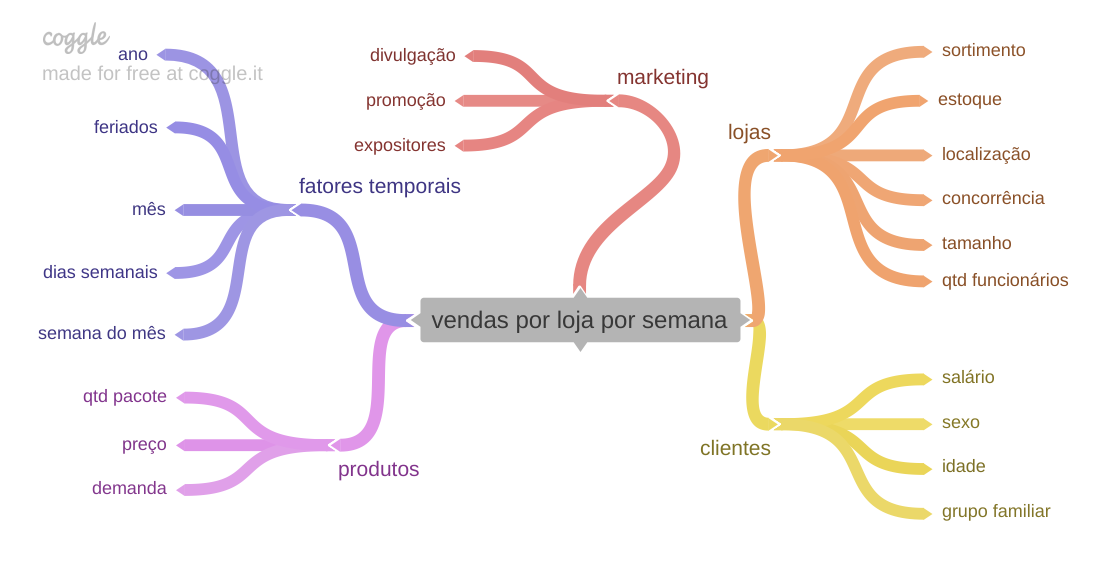

In [16]:
Image('..\\img\\mind_map_hypothesis.png')

## 2.2 Creating Hypothesis

### 2.2.1 Temporal Factors:
1. Com o passar dos anos, as lojas deveriam vender mais.
2. Aos feriados, as lojas deveriam vender mais.
3. Aos ultimos trimestres, as lojas deveriam vender mais.
4. Aos finais de semana, as lojas deveriam vender mais.
5. Às ultimas semanas dos meses, as lojas deveriam vender MENOS.

### 2.2.2 Marketing:
6. Lojas que fazem maior investimento em divulgações, deveriam vender mais.
7. Lojas em Períodos de promoções, deveriam vender mais.
8. Lojas com promoções a mais tempo, deveriam vender mais.
9. Lojas com melhores estruturas de expositores, deveriam vender mais.

### 2.2.3 Clients:
10. Lojas com clientes com maiores salários, deveriam vender mais.
11. Lojas com uma proporção maior de público feminino, deveriam vender mais.
12. Lojas com clientes de faixa etária relativamente maior, deveriam vender mais.
13. Lojas com clientes com grupos familiares maiores, deveriam vender mais.

### 2.2.4 Products:
14. Produtos com pacotes unitários maiores deveriam promover maiores vendas.
15. Produtos com margem de lucro reduzida, deveriam promover maiores vendas.
16. Produtos com maiores demandas, deveriam promover maiores vendas.

### 2.2.5 Stores:
17. Lojas com maior sortimento, deveriam vender mais.
18. Lojas com maiores disponibilidades de estoque, deveriam vender mais.
19. Lojas localizadas em regiões com maiores salários, deveriam vender mais.
20. Lojas com concorrência mais próxima, deveriam vender MENOS.
21. Lojas com concorrência a mais tempo, deveriam vender mais.
22. Lojas de maior porte, deveriam vender mais.
23. Lojas com mais colaboradores, deveriam vender mais.

### 2.2.5 Lista final de hipóteses:

As hipóteses em negrito foram selecionadas e serão estudadas primeiro. O principal critério para selecionar as possíveis hipóteses foi a disponibilidade de features que possibilitem os estudos.

1. Com o passar dos anos, as lojas deveriam vender mais.
2. Aos feriados, as lojas deveriam vender mais.
3. Aos ultimos trimestres, as lojas deveriam vender mais.
4. Aos finais de semana, as lojas deveriam vender mais.
5. Às ultimas semanas dos meses, as lojas deveriam vender MENOS.
6. Lojas em Períodos de promoções, deveriam vender mais.
7. Lojas com promoções a mais tempo, deveriam vender mais.
8. Lojas com maior sortimento, deveriam vender mais.
9. Lojas com concorrência mais próxima, deveriam vender MENOS.
10. Lojas com mais colaboradores, deveriam vender mais.

## 2.3 Creating Features

In [17]:
# week
df1['week'] = df1['date'].dt.isocalendar().week

# year
df1['year'] = df1['date'].dt.year

# year_week
df1['year_week'] = df1['date'].dt.strftime('%Y-%W')

# quarters
df1['year_quarters'] = df1['date'].dt.month.apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))

# weekends
df1['weekends'] = df1['date'].dt.day_name().apply(lambda x: 0 if x not in ['Friday', 'Saturday'] else 1)

# last_week
df1['last_week'] = df1['date'].dt.day.apply(lambda x: 0 if x <= 23 else 1)

# competition_since
df1['competition_since'] = df1.apply(lambda x: datetime.datetime(day=1, month=x['competition_open_since_month'], year=x['competition_open_since_year']), axis=1)
df1['competition_time_month'] = ((df1['date'] - df1['competition_since']) / 30).apply(lambda x: x.days).astype('int')
df1.drop(['competition_since', 'competition_open_since_month', 'competition_open_since_year'], axis=1, inplace=True)

# promo_since
df1['promo2_since'] = df1['promo2_since_year'].astype(str) + '-' + df1['promo2_since_week'].astype(str)
df1['promo2_since'] = df1['promo2_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df1['promo2_time_week'] = ((df1['date'] - df1['promo2_since']) / 7).apply(lambda x: x.days).astype(int)
df1.drop(['promo2_since', 'promo2_since_year', 'promo2_since_week'], axis=1, inplace=True)

# assortment
df1['assortment'] = df1['assortment'].apply(lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')

# state_holiday
df1['state_holiday'] = df1['state_holiday'].apply(lambda x: 'public_holiday' if x=='a' else 'easter_holiday' if x=='b' else 'christmas' if x=='c' else 'regular_day')

# day_of_week
df1['day_of_week'] = df1['date'].dt.day_name()

# 3.0 Data Filtering

## 3.1 Rows filtering

Filtrando lojas fechadas

In [19]:
df2 = df1.loc[(df1['sales']>0)&(df1['open']!=0)]

## 3.2 Columns filtering

In [20]:
cols_drop = ['open']
df2 = df2.drop(cols_drop, axis=1)

A coluna customer não poderá seguir para a modelagem, mas permanecerá no dataset para participar da análise exploratória de dados

# 4.0 Exploratory Data Analysis

## 4.1 Univariate Analysis

### 4.1.1 Response variable

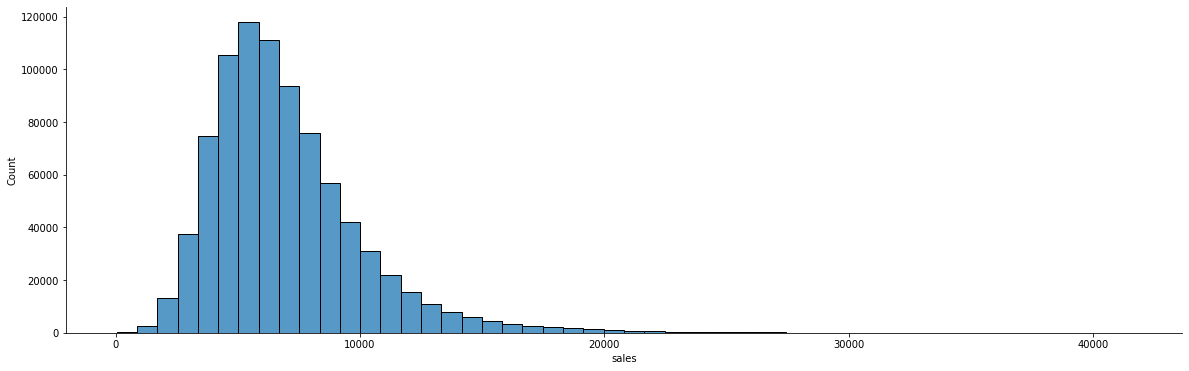

In [21]:
plt.figure(figsize=(20, 6))
sns.histplot(df2['sales'], bins=50)
sns.despine();

Uma distribuição normal, com uma skew positiva, com uma média próxima a 5000

### 4.1.2 Numerical variables

In [22]:
num_attributes.pop(0) # sales foi dropado porque é a target

num_attributes.append('competition_time_month')
num_attributes.append('promo2_time_week')

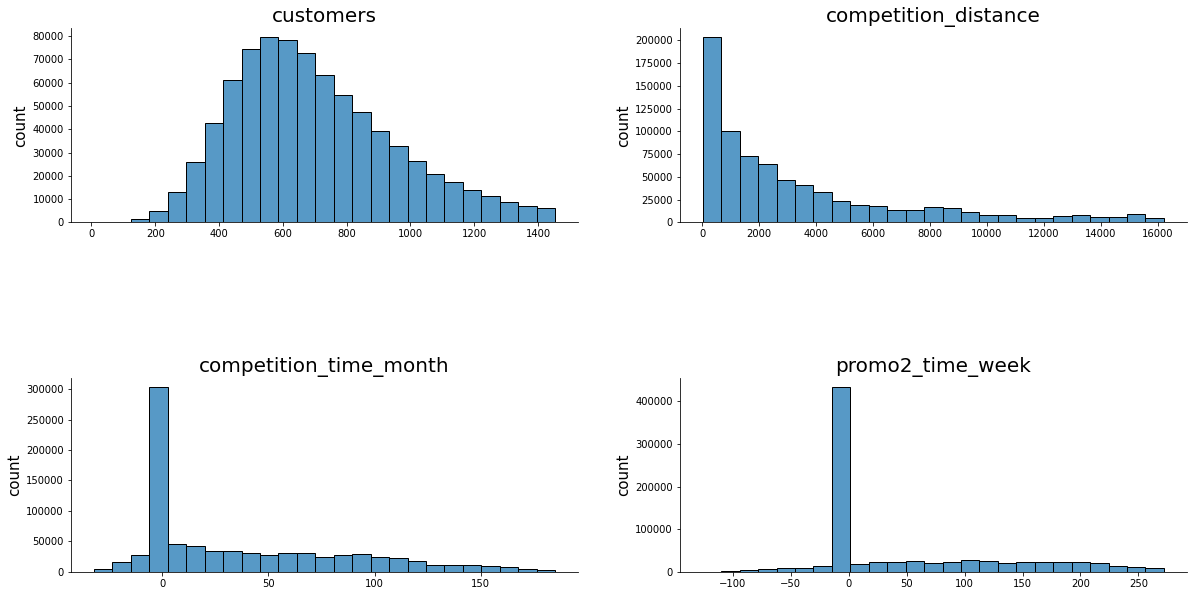

In [23]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.8)

plt.subplot(2, 2, 1)
outliers_indices, li, ls = search_outliers(df2, 'customers')
temp = df2.drop(outliers_indices)
sns.histplot(temp['customers'], bins=25)
sns.despine()
plt.title('customers', fontsize=20)
plt.xlabel('')
plt.ylabel('count', fontsize=15)

plt.subplot(2, 2, 2)
outliers_indices, li, ls = search_outliers(df2, 'competition_distance')
temp = df2.drop(outliers_indices)
sns.histplot(temp['competition_distance'], bins=25)
sns.despine()
plt.title('competition_distance', fontsize=20)
plt.xlabel('')
plt.ylabel('count', fontsize=15)

plt.subplot(2, 2, 3)
outliers_indices, li, ls = search_outliers(df2, 'competition_time_month')
temp = df2.drop(outliers_indices)
sns.histplot(temp['competition_time_month'], bins=25)
sns.despine()
plt.title('competition_time_month', fontsize=20)
plt.xlabel('')
plt.ylabel('count', fontsize=15)

plt.subplot(2, 2, 4)
outliers_indices, li, ls = search_outliers(df2, 'promo2_time_week')
temp = df2.drop(outliers_indices)
sns.histplot(temp['promo2_time_week'], bins=25)
sns.despine()
plt.title('promo2_time_week', fontsize=20)
plt.xlabel('')
plt.ylabel('count', fontsize=15);

1. Customers apresenta uma distribuição próxima a uma normal, com uma skew levemente positiva.
2. A maioria das lojas tem concorrência bastante próxima, uma distribuição parecida com uma Poisson, com uma skew positiva.
3. Competition_time_month com valores bem distribuidos e esparsos.
4. promo2_time_week com valores bem distribuídos e esparços.

### 4.1.2 Categorical variables

In [24]:
cat_attributes.pop(0) # dropando open

temp = 'week year year_quarters weekends last_week'.split()
cat_attributes.extend(temp)

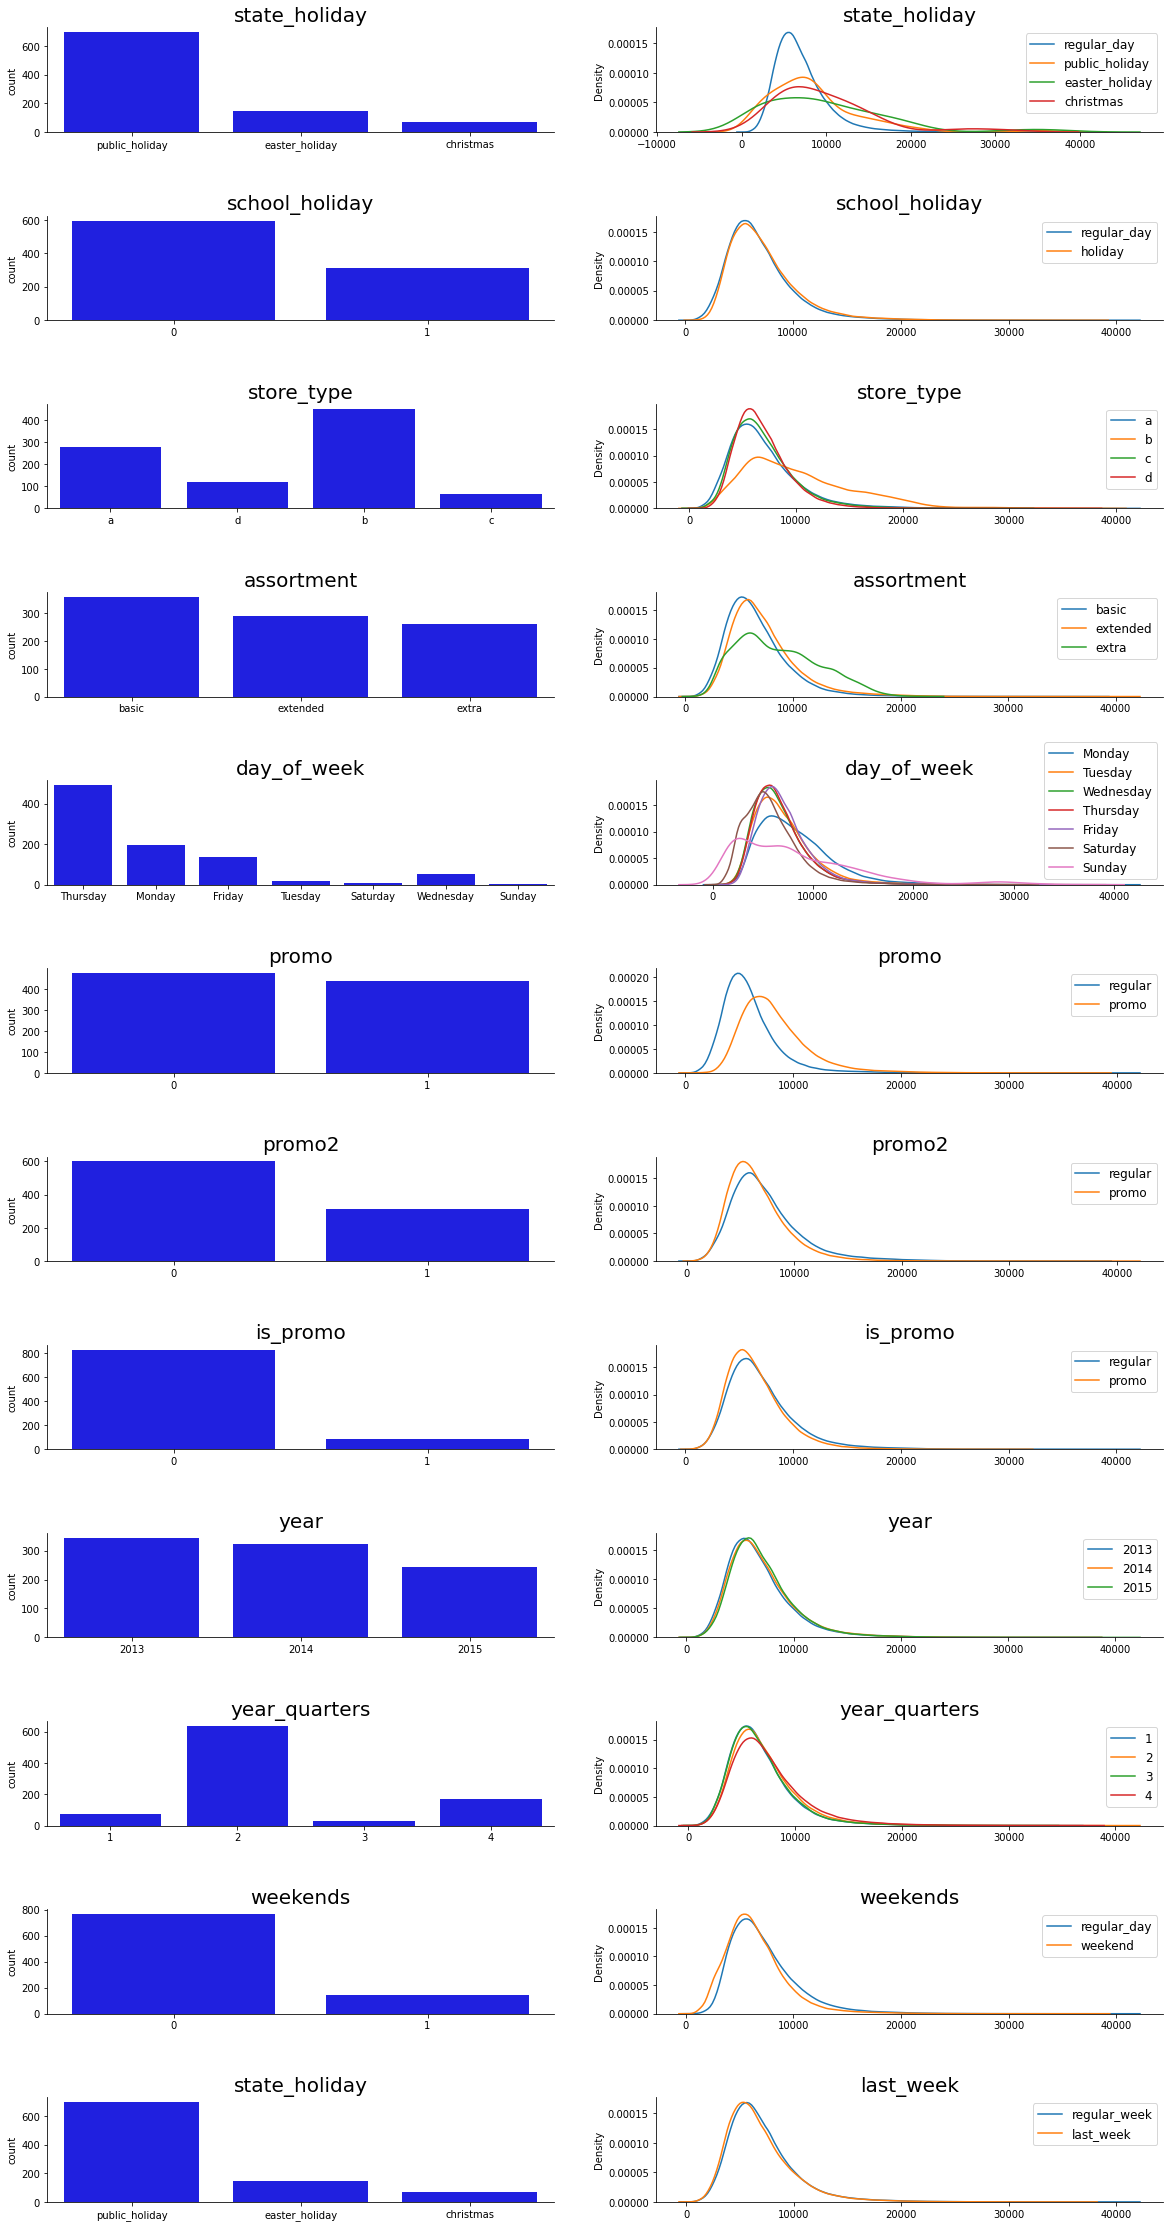

In [36]:
plt.figure(figsize=(20, 40))
plt.subplots_adjust(hspace=0.8)

# state_holiday
plt.subplot(12, 2, 1)
temp = df2[df2['state_holiday']!='regular_day']
sns.countplot(x='state_holiday', data=temp, color='b')
plt.title('state_holiday', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 2)
sns.kdeplot(x='sales', data=df2.loc[df2['state_holiday']=='regular_day'], label='regular_day')
sns.kdeplot(x='sales', data=df2.loc[df2['state_holiday']=='public_holiday'], label='public_holiday')
sns.kdeplot(x='sales', data=df2.loc[df2['state_holiday']=='easter_holiday'], label='easter_holiday')
sns.kdeplot(x='sales', data=df2.loc[df2['state_holiday']=='christmas'], label='christmas')
plt.title('state_holiday', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# school_holiday
plt.subplot(12, 2, 3)
sns.countplot(x='school_holiday', data=temp, color='b')
plt.title('school_holiday', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 4)
sns.kdeplot(x='sales', data=df2.loc[df2['school_holiday']==0], label='regular_day')
sns.kdeplot(x='sales', data=df2.loc[df2['school_holiday']==1], label='holiday')
plt.title('school_holiday', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# store_type
plt.subplot(12, 2, 5)
sns.countplot(x='store_type', data=temp, color='b')
plt.title('store_type', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 6)
sns.kdeplot(x='sales', data=df2.loc[df2['store_type']=='a'], label='a')
sns.kdeplot(x='sales', data=df2.loc[df2['store_type']=='b'], label='b')
sns.kdeplot(x='sales', data=df2.loc[df2['store_type']=='c'], label='c')
sns.kdeplot(x='sales', data=df2.loc[df2['store_type']=='d'], label='d')
plt.title('store_type', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# assortment
plt.subplot(12, 2, 7)
sns.countplot(x='assortment', data=temp, color='b')
plt.title('assortment', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 8)
sns.kdeplot(x='sales', data=df2.loc[df2['assortment']=='basic'], label='basic')
sns.kdeplot(x='sales', data=df2.loc[df2['assortment']=='extended'], label='extended')
sns.kdeplot(x='sales', data=df2.loc[df2['assortment']=='extra'], label='extra')
plt.title('assortment', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# day_of_week
plt.subplot(12, 2, 9)
sns.countplot(x='day_of_week', data=temp, color='b')
plt.title('day_of_week', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 10)
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Monday'], label='Monday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Tuesday'], label='Tuesday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Wednesday'], label='Wednesday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Thursday'], label='Thursday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Friday'], label='Friday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Saturday'], label='Saturday')
sns.kdeplot(x='sales', data=df2.loc[df2['day_of_week']=='Sunday'], label='Sunday')
plt.title('day_of_week', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# promo
plt.subplot(12, 2, 11)
sns.countplot(x='promo', data=temp, color='b')
plt.title('promo', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 12)
sns.kdeplot(x='sales', data=df2.loc[df2['promo']==0], label='regular')
sns.kdeplot(x='sales', data=df2.loc[df2['promo']==1], label='promo')
plt.title('promo', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# promo2
plt.subplot(12, 2, 13)
sns.countplot(x='promo2', data=temp, color='b')
plt.title('promo2', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 14)
sns.kdeplot(x='sales', data=df2.loc[df2['promo2']==0], label='regular')
sns.kdeplot(x='sales', data=df2.loc[df2['promo2']==1], label='promo')
plt.title('promo2', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# is_promo
plt.subplot(12, 2, 15)
sns.countplot(x='is_promo', data=temp, color='b')
plt.title('is_promo', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 16)
sns.kdeplot(x='sales', data=df2.loc[df2['is_promo']==0], label='regular')
sns.kdeplot(x='sales', data=df2.loc[df2['is_promo']==1], label='promo')
plt.title('is_promo', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# year
plt.subplot(12, 2, 17)
sns.countplot(x='year', data=temp, color='b')
plt.title('year', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 18)
sns.kdeplot(x='sales', data=df2.loc[df2['year']==2013], label='2013')
sns.kdeplot(x='sales', data=df2.loc[df2['year']==2014], label='2014')
sns.kdeplot(x='sales', data=df2.loc[df2['year']==2015], label='2015')
plt.title('year', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# year_quarters
plt.subplot(12, 2, 19)
sns.countplot(x='year_quarters', data=temp, color='b')
plt.title('year_quarters', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 20)
sns.kdeplot(x='sales', data=df2.loc[df2['year_quarters']==1], label='1')
sns.kdeplot(x='sales', data=df2.loc[df2['year_quarters']==2], label='2')
sns.kdeplot(x='sales', data=df2.loc[df2['year_quarters']==3], label='3')
sns.kdeplot(x='sales', data=df2.loc[df2['year_quarters']==4], label='4')
plt.title('year_quarters', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# weekends
plt.subplot(12, 2, 21)
sns.countplot(x='weekends', data=temp, color='b')
plt.title('weekends', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 22)
sns.kdeplot(x='sales', data=df2.loc[df2['weekends']==0], label='regular_day')
sns.kdeplot(x='sales', data=df2.loc[df2['weekends']==1], label='weekend')
plt.title('weekends', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine()

# last_week
plt.subplot(12, 2, 23)
sns.countplot(x='state_holiday', data=temp, color='b')
plt.title('state_holiday', fontsize=20)
plt.xlabel('')
sns.despine()

plt.subplot(12, 2, 24)
sns.kdeplot(x='sales', data=df2.loc[df2['last_week']==0], label='regular_week')
sns.kdeplot(x='sales', data=df2.loc[df2['last_week']==1], label='last_week')
plt.title('last_week', fontsize=20)
plt.xlabel('')
plt.legend(prop={'size': 12})
sns.despine();
# week

## 4.2 Bivariate Analysis

#### H1 Com o passar dos anos, as lojas deveriam vender mais.

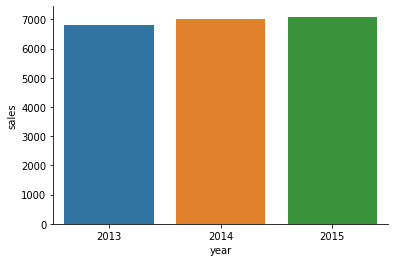

In [26]:
temp = df2.groupby('year').agg({'sales':'mean'}).reset_index()
sns.barplot(x='year', y='sales', data=temp)
sns.despine();

#### H2 Aos feriados, as lojas deveriam vender mais

#### H3 Aos ultimos trimestres, as lojas deveriam vender mais.

#### H4 Aos finais de semana, as lojas deveriam vender mais.

#### H5 Às ultimas semanas dos meses, as lojas deveriam vender MENOS.**.

#### H6 Períodos de promoções, deveriam vender mais.

#### H7 Lojas com promoções a mais tempo, deveriam vender mais.

#### H8 Lojas com maior sortimento, deveriam vender mais.

<AxesSubplot:xlabel='year_week'>

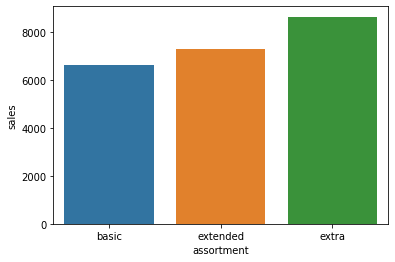

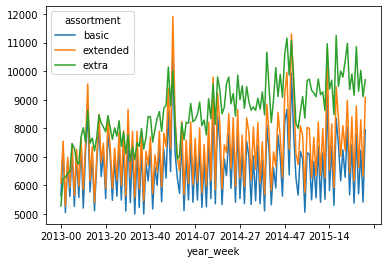

In [27]:
temp = df2.groupby('assortment').agg({'sales':'mean'}).reset_index()
sns.barplot(x='assortment', y='sales', data=temp)

temp = df2.groupby(['year_week', 'assortment']).agg({'sales':'mean'}).reset_index()
temp = temp.pivot(index='year_week', columns='assortment', values='sales')
temp.plot()

In [28]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );
aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment'] ).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

NameError: name 'df4' is not defined

#### H9 Lojas com concorrência mais próxima, deveriam vender **MENOS**.

#### H10 Lojas com concorrência a mais tempo, deveriam vender mais.

## 4.3 Multivariate Analysis